# Introduction

## Why Gadfly?
Julia has many packages for visualizing data, but we will focus on one in particular: Gadfly. There are a few reasons for choosing this one:
- grammar of graphics logic (if you like ggplot, you'll love this!)
- easy specification of plotting variables based on DataFrame columns
- wide variety of publication-quality plots

## Installing Gadfly and Other Packages
For this tutorial, we will need the following packages:
- [Gadfly](http://gadflyjl.org/stable/) for plotting
- [RDatasets](https://github.com/JuliaStats/RDatasets.jl) for example data
- [DataFrames](https://dataframes.juliadata.org/stable/) for manipulating data
- [DataFramesMeta](https://juliadata.github.io/DataFramesMeta.jl/stable/) for easier data filtering
- [Cairo](https://github.com/JuliaGraphics/Cairo.jl) for saving plots to file
- [Fontconfig](https://github.com/JuliaGraphics/Fontconfig.jl) for saving plots to file
- [Pipe](https://github.com/oxinabox/Pipe.jl) for chaining together data processing and plotting steps

To install these packages, follow these steps:
1. Open a terminal window and launch Julia (by issuing the `julia` command)
2. Type `]` to enter the Julia Package Manager
3. Type `add Gadfly` and hit enter
4. Type `add RDatasets` and hit enter
5. Type `add DataFrames` and hit enter
6. Type `add DataFramesMeta` and hit enter
7. Type `add Cairo` and hit enter
8. Type `add Fontconfig` and hit enter
9. Type `add Pipe` and hit enter
10. Hit the backspace key to exit the Package Manager
11. Close the terminal window

## Loading Packages
As well as the Gadfly package, we will use the CSV package to load data, and the DataFrames package to provide the data structure that we will work with:

In [1]:
using Gadfly
using DataFrames
using DataFramesMeta
using RDatasets
using Cairo
using Fontconfig
using Pipe

## Data Preview
We chose the mtcars dataset because it has a good variety of data types, allowing us to create a wide range of plots. We can see the data types in each column by loading the data into a DataFrame, and using the eltype and mapcols functions:

In [2]:
mtcars = dataset("datasets", "mtcars")
mapcols(eltype, mtcars)

1×12 DataFrame
 Row │ Model     MPG       Cyl       Disp      HP        DRat      WT        Q ⋯
     │ DataType  DataType  DataType  DataType  DataType  DataType  DataType  D ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ String31  Float64   Int64     Float64   Int64     Float64   Float64   F ⋯
                                                               5 columns omitted

We will make one change to this data before using it for plotting - by adding an extra column where Cyl is a string rather than an int, we can group together many different cars with the same number of cylinders.

In [52]:
mtcars[!,:Cyl_str] = string.(mtcars[!,:Cyl])
first(mtcars[!,[:Cyl, :Cyl_str]], 3)

3×2 DataFrame
 Row │ Cyl    Cyl_str 
     │ Int64  String  
─────┼────────────────
   1 │     6  6
   2 │     6  6
   3 │     4  4

# Basic Plots
In Gadfly, all plot types are created with the `plot()` function. This takes 4 arguments:
1. The DataFrame holding the data
2. The column name for the x axis, preceded by a `:`
3. The column for the y axis (if applicable), preceded by a `:`
4. The Geom, which specifies the type of plot

If you are not familiar with the concept of a Geom or the general grammar of graphics framework, read more about them in [this](https://vita.had.co.nz/papers/layered-grammar.html) introduction. 

## Scatter Plot
To generate a scatter plot, we use `Geom.point`:

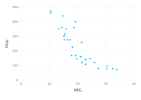

In [3]:
scatter = plot(mtcars, x=:MPG, y=:Disp, Geom.point)

## Bar Plot
To generate a bar plot, we use `Geom.bar`. To make it place the bars next to each other, we pass the `position=:dodge` argument to the `Geom.bar` object:

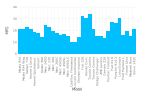

In [80]:
bar = plot(mtcars, x=:Model, y=:MPG, Geom.bar(position=:dodge))

## Box Plot
To generate a boxplot, we use `Geom.boxplot`. To colour the boxes differently, we pass the same column name to `x` and `color`. Note that Gadfly creates the legend for us:

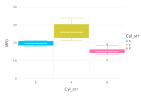

In [81]:
box = plot(mtcars, x=:Cyl_str, y=:MPG, color=:Cyl_str, Geom.boxplot)

## Violin Plot
To generate a violin plot, we use `Geom.violin`. To put the dicrete values on the x axis into a specific order, we pass a list of values to the `levels` argument within the `Scale.x_discrete` parameter:

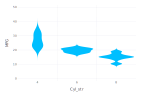

In [82]:
violin = plot(mtcars, x=:Cyl_str, y=:MPG, Geom.violin,
    Scale.x_discrete(levels=["4", "6", "8"])
)

## Histogram
To plot a histogram, we use `Geom.histogram`. To specify the number of bins, we pass the `bincount` argument to the `Geom.histogram` object:

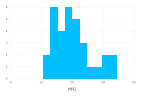

In [83]:
hist = plot(mtcars, x=:MPG, Geom.histogram(bincount=10))

# Customizing Plot Appearance
The examples above show the range of plots that Gadfly can produce, but some of them don't look too nice in their default states. We can customise the appearance of any plot by adding a `Theme()` object as the last argument. This allows us to change specific parts of the plot, such as:
- `panel_stroke` = the colour for the border around the plot panel
- `default_colour` = the colour of the plot object e.g. points, line etc
- `major_label_font_size` = the size of the axis titles and legend title
- `minor_label_font_size` = the size of the axis labels and legend entries
- `bar_highlight` = the colour of the outline of bars

For a full list of parameters that Theme can contain, see the Gadfly docs [here](http://gadflyjl.org/stable/lib/gadfly/#Gadfly.Theme)

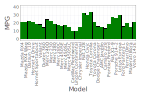

In [108]:
fancy_bar = plot(mtcars, x=:Model, y=:MPG, Geom.bar(position=:dodge),
    Theme(
        panel_stroke=color("black"),
        default_color=color("green"),
        major_label_font_size=18pt,
        minor_label_font_size=12pt,
        bar_highlight=color("black")
    )
)

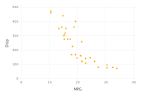

In [76]:
fancy_scatter = plot(mtcars, x=:MPG, y=:Disp, Geom.point,
    Theme(
        default_color=color("orange")
    )
)

## Adding Plot Title
If we want to add a title to a plot, we don't do this within `Theme()`. Instead, we modify the `Guide` object by setting its `.title()` attribute:

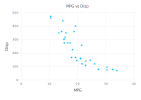

In [5]:
scatter = plot(mtcars, x=:MPG, y=:Disp, Geom.point, Guide.title("MPG vs Disp"))

# Multipanel Plots
There are two ways that we can create multiple plots in one figure. If we want to create several plots of the same type with shared axis ranges (e.g. for comparing patterns for each value of a discrete variable), we can use the `Geom.subplot_grid`, which takes our Geom of interest as its argument:

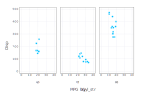

In [111]:
multi = plot(mtcars, x=:MPG, y=:Disp, xgroup=:Cyl_str,
    Geom.subplot_grid(Geom.point),
    Theme(panel_stroke=color("black"))
)

If we want to combine several different plot types from different data sources into one multi-panel plot, we can assign each plot to a separate variable, and use the `hstack()` function to arrange them in one row, or the  in `gridstack()`:

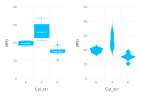

In [89]:
p1 = plot(mtcars, x=:MPG, y=:Disp, Geom.point)
p2 = plot(mtcars, x=:MPG, y=:Cyl, Geom.point)
p3 = plot(mtcars, x=:Cyl_str, y=:MPG, Geom.boxplot)
p4 = plot(mtcars, x=:Cyl_str, y=:MPG, Geom.violin)
hstack(p3, p4)

We can also use the `vstack()` function to arrange them in one column:

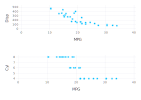

In [90]:
vstack(p1, p2)

We can use the `gridstack()` function to arrange them across >1 row and column. Note that `;` is used to start a new row:

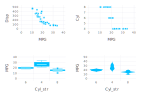

In [93]:
gridstack([p1 p2; p3 p4])

# Saving Plots to File

To save a plot to a file on disk, we need to carry out two steps:
1. Create an image file on disk of the desired type and with the desired proportions, using `SVG()`, `PDF()` or `PNG()`
2. Write the plot to the file, using `draw()`

In [100]:
scatterplot = plot(mtcars, x=:Disp, y=:MPG, Geom.point())
svg = SVG("scatter.svg", 10cm, 10cm)
draw(svg, scatterplot)

false

In [107]:
pdf = PDF("scatter.pdf", 10cm, 10cm)
draw(pdf, scatterplot)

In [106]:
png = PNG("scatter.png", 10cm, 10cm)
draw(png, scatterplot)

# Pipelines for Processing and Plotting

Often we want to do some processing of our data before plotting it, such as filtering, grouping or transforming. By using the `@pipe` and `|>` operators from the `Pipe` package, we can do all of these steps in one go. This means that we don't accumulate multiple versions of a dataset in different variables, and makes it easier to change a step in the process. For example, we can:
1. Filter out cars that give fewer than 20 MPG
2. Calculate the maximum displacement for cars with 4, 6 and 8 cylinders
3. Generate a bar plot to illustrate the results

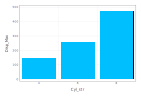

In [139]:
@pipe mtcars |>
    @subset(_, :MPG .>= 10) |>
    groupby(_, :Cyl_str) |>
    @combine(_, :Disp_Max = maximum(:Disp))|>
    plot(_, x=:Cyl_str, y=:Disp_Max, Geom.bar(position=:dodge),
        Scale.x_discrete(levels=["4", "6", "8"]),
        Theme(
            panel_stroke=color("black"),
            bar_highlight=color("black"),
            bar_spacing=5mm
        )
    )